# [Goulib](../notebook.ipynb).colors
color toolbox


In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999; // to avoid a scrollbar in Pantone table below

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from Goulib.notebook import *
from Goulib.colors import *

## Standard colors

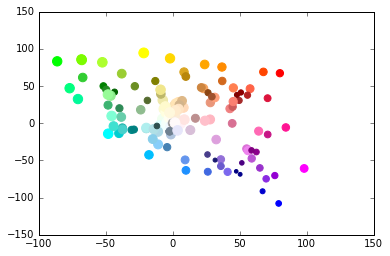

In [27]:
x,y,z,c,l=[],[],[],[],[]
for id in color:
    p=color[id]
    x.append(p.lab[1])
    y.append(p.lab[2])
    z.append(p.lab[0])
    c.append(p.hex)
    l.append(p.name)
    
matplotlib.pyplot.scatter(x,y,s=z,color=c) #already cool

In [4]:
c=color['blue'] # color is a dict of RGB #hex colors defined in Matplotlib indexed by their name
c2=color_lookup[c.hex] # reversed dict to retrieve color by hex string
c2

Color('blue')

In [5]:
red=Color('red') #Color objects can be init'ed by name,
green=Color('#00ff00') # by RGB hex string,
blue=Color((0,0,1)) #or by RGB triplet
blue # Color objects have an HTML representation

Color('blue')

In [6]:
#colors can be added
cyan=blue+green
magenta=blue+red
yellow=red+green

print(magenta.name, magenta.hex, magenta.rgb) # see ? the color name of the sum is correct too !
print(cyan, magenta, yellow)

In [7]:
magenta-cyan-yellow #and colors can be substracted too

Color('black')

In [8]:
Color(magenta-cyan-yellow).rgb

(0.0, 0.0, 0.0)

In [9]:
c= Color('gray')-red # colors can be substracted too. RGB values are bounded
print(c,c.name, c.hex, c.rgb) # see ? the color name of the sum is correct too !

In [10]:
from random import random
r=[Color((random(),random(),random())) for _ in range(10)]
print(*r) # unknown colors recieve name of the nearest known color with a tile before

In [11]:
print(*map(Color,color_range(5,'red','blue')))

## Colors space conversions

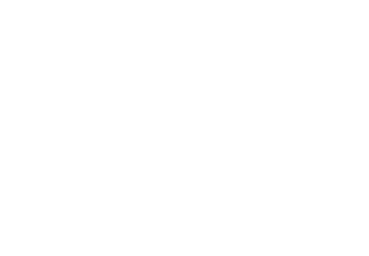

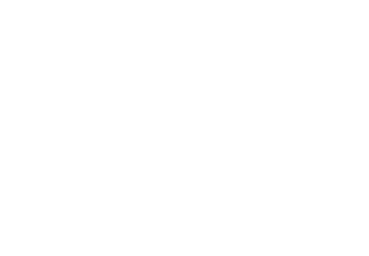

In [12]:
converters #should deisplay the graph of converters here ...

In [13]:
cmyk=Color((.45,.12,.67,.05),mode='cmyk') # a random cmyk color
print(cmyk,cmyk.cmyk)

## Pantone colors

In [14]:
# pantone is a dict of Colors initialized from Lab values
bred=pantone['1795C'] #BOBST Red
bred2=Color(bred.hex) #the corresponding RGB color
print(bred,bred2,deltaE(bred,bred2))

In [15]:
p=nearest_color(cmyk,pantone) # find best matching Pantone color
print(p,cmyk,deltaE(p,cmyk))

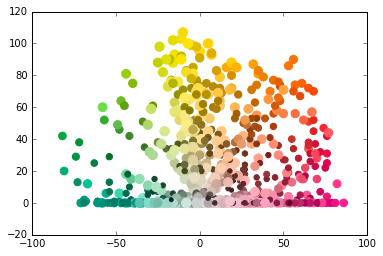

In [29]:
x,y,z,c,l=[],[],[],[],[]
for id in pantone:
    p=pantone[id]
    x.append(p.lab[1])
    y.append(p.lab[2])
    z.append(p.lab[0])
    c.append(p.hex)
    l.append(p.name)
    
matplotlib.pyplot.scatter(x,y,s=z,color=c) #already cool

In [30]:
import mpld3 #much cooler !
fig, ax = plt.subplots()
scatter = ax.scatter(x,y,c=c,lw=0,s=z)
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=l)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()


In [18]:
from Goulib.table import Table, Cell
from Goulib.itertools2 import reshape

labels=(color['black'],color['white']) #possible colors for labels
t=[]
for id in sorted(pantone,key=lambda c:int(c[:-2])):
    c=pantone[id]
    c2=nearest_color(c,labels,opt=max) #chose the label color with max difference to pantone color
    c2._name=id
    s=html(c2)
    t.append(Cell(s,style={'background-color':c.hex}))
Table(reshape(t,(0,10)))

108C,106C,101C,107C,102C,109C,103C,105C,104C,100C
111C,114C,116C,113C,117C,119C,110C,118C,115C,112C
126C,124C,121C,122C,120C,129C,125C,123C,127C,128C
131C,134C,130C,135C,136C,137C,139C,133C,132C,138C
142C,141C,140C,147C,143C,146C,149C,148C,145C,144C
151C,154C,155C,153C,156C,159C,150C,157C,152C,158C
167C,165C,160C,164C,163C,169C,168C,162C,166C,161C
178C,179C,172C,177C,171C,173C,175C,170C,176C,174C
180C,184C,183C,186C,185C,181C,188C,187C,182C,189C
192C,194C,191C,197C,193C,199C,190C,196C,198C,203C
200C,209C,205C,208C,207C,201C,202C,204C,206C,214C
